In [1]:
# Import packages
import matplotlib.pyplot as plt
import nltk
import wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from collections import Counter
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

Import text

In [2]:
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

nltk.download('punkt_tab')
    
filename = 'sonnets.txt'
with open(filename, 'r', encoding='utf-8') as file:
    text_data = file.read()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


Tokenize

In [4]:
tokens = word_tokenize(text_data)
tokens

['SONNETS',
 'TO',
 'THE',
 'ONLY',
 'BEGETTER',
 'OF',
 'THESE',
 'INSUING',
 'SONNETS',
 'MR.',
 'W.',
 'H.',
 'ALL',
 'HAPPINESS',
 'AND',
 'THAT',
 'ETERNITY',
 'PROMISED',
 'BY',
 'OUR',
 'EVER-LIVING',
 'POET',
 'WISHETH',
 'THE',
 'WELL-WISHING',
 'ADVENTURER',
 'IN',
 'SETTING',
 'FORTH',
 'T.',
 'T.',
 'I',
 '.',
 'FROM',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 ',',
 'That',
 'thereby',
 'beauty',
 "'s",
 'rose',
 'might',
 'never',
 'die',
 ',',
 'But',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease',
 ',',
 'His',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memory',
 ':',
 'But',
 'thou',
 ',',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 ',',
 "Feed'st",
 'thy',
 "light'st",
 'flame',
 'with',
 'self-substantial',
 'fuel',
 ',',
 'Making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies',
 ',',
 'Thyself',
 'thy',
 'foe',
 ',',
 'to',
 'thy',
 'sweet',
 'self',
 'too',
 'cruel',
 '.',
 'Thou',
 'that',
 'art',
 'now',
 '

Lemmatizer and stop words

In [6]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

Pre-processed tokens

In [21]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [22]:
processed_tokens = [
    lemmatizer.lemmatize(word.lower())
    for word in tokens
    if word.isalpha() and word.lower() not in stop_words and 2 <= len(word) <= 15
]

In [23]:
processed_tokens

['sonnet',
 'begetter',
 'insuing',
 'sonnet',
 'happiness',
 'eternity',
 'promised',
 'poet',
 'wisheth',
 'adventurer',
 'setting',
 'forth',
 'fairest',
 'creature',
 'desire',
 'increase',
 'thereby',
 'beauty',
 'rose',
 'might',
 'never',
 'die',
 'riper',
 'time',
 'decease',
 'tender',
 'heir',
 'might',
 'bear',
 'memory',
 'thou',
 'contracted',
 'thine',
 'bright',
 'eye',
 'thy',
 'flame',
 'fuel',
 'making',
 'famine',
 'abundance',
 'lie',
 'thyself',
 'thy',
 'foe',
 'thy',
 'sweet',
 'self',
 'cruel',
 'thou',
 'art',
 'world',
 'fresh',
 'ornament',
 'herald',
 'gaudy',
 'spring',
 'within',
 'thine',
 'bud',
 'buriest',
 'thy',
 'content',
 'tender',
 'churl',
 'makest',
 'waste',
 'niggarding',
 'pity',
 'world',
 'else',
 'glutton',
 'eat',
 'world',
 'due',
 'grave',
 'thee',
 'ii',
 'forty',
 'winter',
 'shall',
 'beseige',
 'thy',
 'brow',
 'dig',
 'deep',
 'trench',
 'thy',
 'beauty',
 'field',
 'thy',
 'youth',
 'proud',
 'livery',
 'gazed',
 'tatter',
 'weed'

Bags of words creation

In [24]:
raw_bag = Counter(word_tokenize(text_data))
cleaned_bag = Counter(processed_tokens)

vectorizer = CountVectorizer(ngram_range=(2, 2))
ngrams = vectorizer.fit_transform([' '.join(processed_tokens)])
ngrams_bag = {key.replace(' ', '-'): value for key, value in zip(vectorizer.get_feature_names_out(), ngrams.toarray().sum(axis=0))}

ngrams_df = pd.DataFrame(ngrams_bag.items(), columns=['2-gram', 'Count']).sort_values(by='Count', ascending=False)
print(ngrams_df.head(20))

          2-gram  Count
7295    thou-art     34
4605    mine-eye     24
7320   thou-dost     13
7226   thine-eye     12
7611    thy-love     12
7672   thy-sweet     12
7535  thy-beauty     12
7412   thou-wilt     10
1731   dost-thou     10
4197   love-thee      9
7343   thou-hast      9
7597   thy-heart      9
4153   love-love      8
7358  thou-mayst      8
7686   thy-worth      7
7150   thee-thou      7
7387  thou-shalt      7
4200   love-thou      7
7912   true-love      6
6900  sweet-love      6


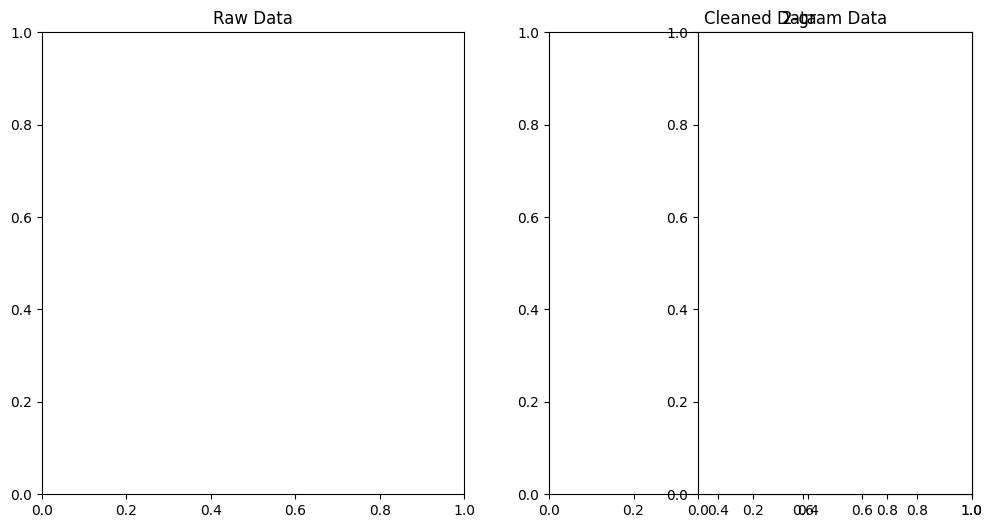

In [25]:
# Visualize word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
try:
    WordCloud(width=400, height=300).generate_from_frequencies(raw_bag).to_image().show()
    plt.title('Raw Data')
except NameError:
    print("WordCloud module is missing, skipping word cloud visualization for raw data.")

plt.subplot(1, 2, 2)
try:
    WordCloud(width=400, height=300).generate_from_frequencies(cleaned_bag).to_image().show()
    plt.title('Cleaned Data')
except NameError:
    print("WordCloud module is missing, skipping word cloud visualization for cleaned data.")

plt.subplot(1, 3, 3)
try:
    WordCloud(width=400, height=300).generate_from_frequencies(ngrams_bag).to_image().show()
    plt.title('2-gram Data')
except NameError:
    print("WordCloud module is missing, skipping word cloud visualization for 2-gram data.")

In [26]:
top_words = pd.DataFrame(cleaned_bag.most_common(20), columns=['Word', 'Count'])
print(top_words)

top_ngrams = pd.DataFrame(sorted(ngrams_bag.items(), key=lambda x: x[1], reverse=True)[:20], columns=['2-gram', 'Count'])
print(top_ngrams)

      Word  Count
0      thy    266
1     thou    234
2     love    196
3     thee    162
4      eye     93
5     doth     88
6     time     78
7   beauty     74
8     mine     63
9    sweet     61
10   heart     61
11   shall     59
12     art     53
13    make     52
14     yet     50
15   thine     44
16     day     43
17     one     43
18    hath     43
19   still     41
        2-gram  Count
0     thou-art     34
1     mine-eye     24
2    thou-dost     13
3    thine-eye     12
4   thy-beauty     12
5     thy-love     12
6    thy-sweet     12
7    dost-thou     10
8    thou-wilt     10
9    love-thee      9
10   thou-hast      9
11   thy-heart      9
12   love-love      8
13  thou-mayst      8
14   love-thou      7
15   thee-thou      7
16  thou-shalt      7
17   thy-worth      7
18   dear-love      6
19  sweet-love      6


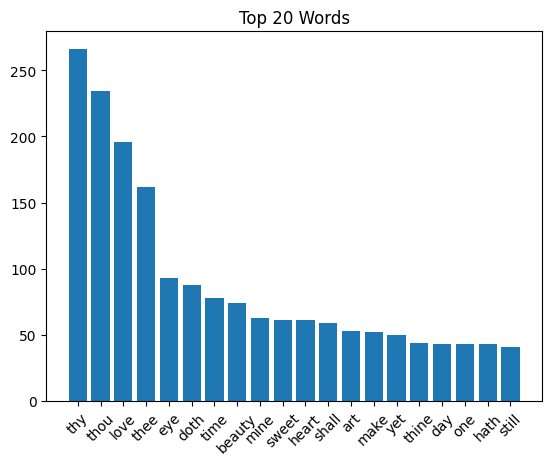

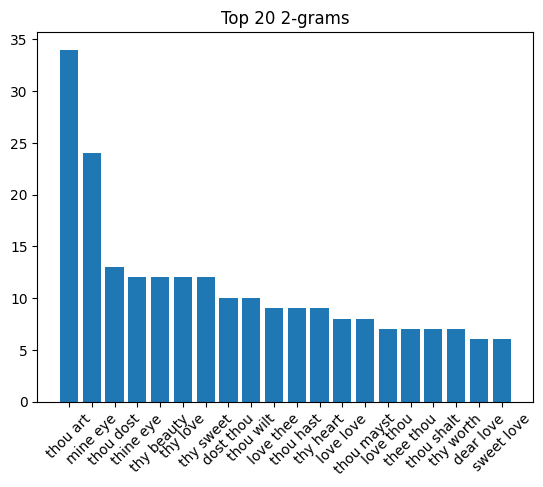

Complete 2-gram Bag of Words:
                  2-gram  Count
7295            thou art     34
4605            mine eye     24
7320           thou dost     13
7226           thine eye     12
7611            thy love     12
...                  ...    ...
2971       ground borrow      1
2970        grossly dyed      1
2969      gross painting      1
2968          gross body      1
8839  zealous pilgrimage      1

[8840 rows x 2 columns]


In [38]:
plt.figure()
plt.bar(top_words['Word'], top_words['Count'])
plt.title('Top 20 Words')
plt.xticks(rotation=45)
plt.show()

plt.figure()
plt.bar(top_ngrams['2-gram'], top_ngrams['Count'])
plt.title('Top 20 2-grams')
plt.xticks(rotation=45)
plt.show()

print("Complete 2-gram Bag of Words:")
print(ngrams_df)

Processing data for NN input

In [27]:
text_data = text_data.replace("  ", "")
text_data = text_data.split('\n\n')  # Split the text into separate sonnets
text_data = text_data[4::2]  # Select every second entry starting from the 5th

Special characters for NN processing

In [29]:
start_of_text_character = "\x0002"
whitespace_character = "\x00B7"
end_of_text_character = "\x2403"
newline_character = "\x00B6"

Start char & spaces/ new lines

In [30]:
text_data = [start_of_text_character + text for text in text_data]
text_data = [text.replace(" ", whitespace_character).replace("\n", newline_character) for text in text_data]

Unique chars and sentence prep

In [32]:
unique_characters = sorted(set(''.join(text_data)))
num_unique_characters = len(unique_characters)
num_documents = len(text_data)
XTrain = []
YTrain = []

In [34]:
for i, doc in enumerate(text_data):
    sequence_length = len(doc)
    idx = [unique_characters.index(char) for char in doc]
    X = np.zeros((num_unique_characters, sequence_length))
    for j, index in enumerate(idx):
        X[index, j] = 1
    
    characters_shifted = list(doc[1:]) + [end_of_text_character]
    Y = pd.Categorical(characters_shifted, categories=unique_characters)
    XTrain.append(X)
    YTrain.append(Y)

print(text_data[0])  # Display the first processed document
print(YTrain[0])  # Display the first YTrain sequence

 02FROM B7fairest B7creatures B7we B7desire B7increase, B6That B7thereby B7beauty's B7rose B7might B7never B7die, B6But B7as B7the B7riper B7should B7by B7time B7decease, B6His B7tender B7heir B7might B7bear B7his B7memory: B6But B7thou, B7contracted B7to B7thine B7own B7bright B7eyes, B6Feed'st B7thy B7light'st B7flame B7with B7self-substantial B7fuel, B6Making B7a B7famine B7where B7abundance B7lies, B6Thyself B7thy B7foe, B7to B7thy B7sweet B7self B7too B7cruel. B6Thou B7that B7art B7now B7the B7world's B7fresh B7ornament B6And B7only B7herald B7to B7the B7gaudy B7spring, B6Within B7thine B7own B7bud B7buriest B7thy B7content B6And, B7tender B7churl, B7makest B7waste B7in B7niggarding. B6Pity B7the B7world, B7or B7else B7this B7glutton B7be, B6To B7eat B7the B7world's B7due, B7by B7the B7grave B7and B7thee.
['0', '2', 'F', 'R', 'O', ..., 'h', 'e', 'e', '.', NaN]
Length: 821
Categories (65, object): [' ', '\t', '!', ''', ..., 'w', 'x', 'y', 'z']
